In [26]:
from pdf2image import convert_from_path
import numpy as np
import matplotlib.pyplot as plt
import easyocr
from PIL import ImageDraw

In [17]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


### specify the path

In [18]:
path = input()

/Users/nilavo/Resume/test-lol.pdf


In [19]:
images = convert_from_path(path)

In [20]:
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x17FF9B5E0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x103D05580>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x103D05340>]

### specify the page number

In [28]:
page_no = int(input())-1

1


In [29]:
output = reader.readtext(np.array(images[page_no]))

In [30]:
output

[([[1141, 217], [1527, 217], [1527, 281], [1141, 281]],
  'YOUR NAME',
  0.9995448940339186),
 ([[226, 218], [414, 218], [414, 340], [226, 340]], 'YN', 0.9999011249251576),
 ([[806, 294], [1182, 294], [1182, 326], [806, 326]],
  'PROFESSION OR INDUSTRY',
  0.8190901329489556),
 ([[1206, 293], [1524, 293], [1524, 326], [1206, 326]],
  'LINK TO OTHER ONLINE',
  0.9860740425890254),
 ([[947, 327], [1527, 327], [1527, 363], [947, 363]],
  'PROPERTIES: PORTFOLIO/ WEBSITE/ BLOG',
  0.5521960566453094),
 ([[116, 570], [336, 570], [336, 618], [116, 618]],
  'OBJECTIVE',
  0.9985951270525391),
 ([[642, 572], [902, 572], [902, 616], [642, 616]],
  'EXPERIENCE',
  0.9999259609348424),
 ([[117, 667], [405, 667], [405, 707], [117, 707]],
  'To get started, click',
  0.6787269038031231),
 ([[642, 672], [780, 672], [780, 704], [642, 704]],
  'JOB TITLE',
  0.9950809700611305),
 ([[808, 672], [956, 672], [956, 704], [808, 704]],
  'COMPANY',
  0.9996525469359391),
 ([[984, 671], [1168, 671], [1168, 70

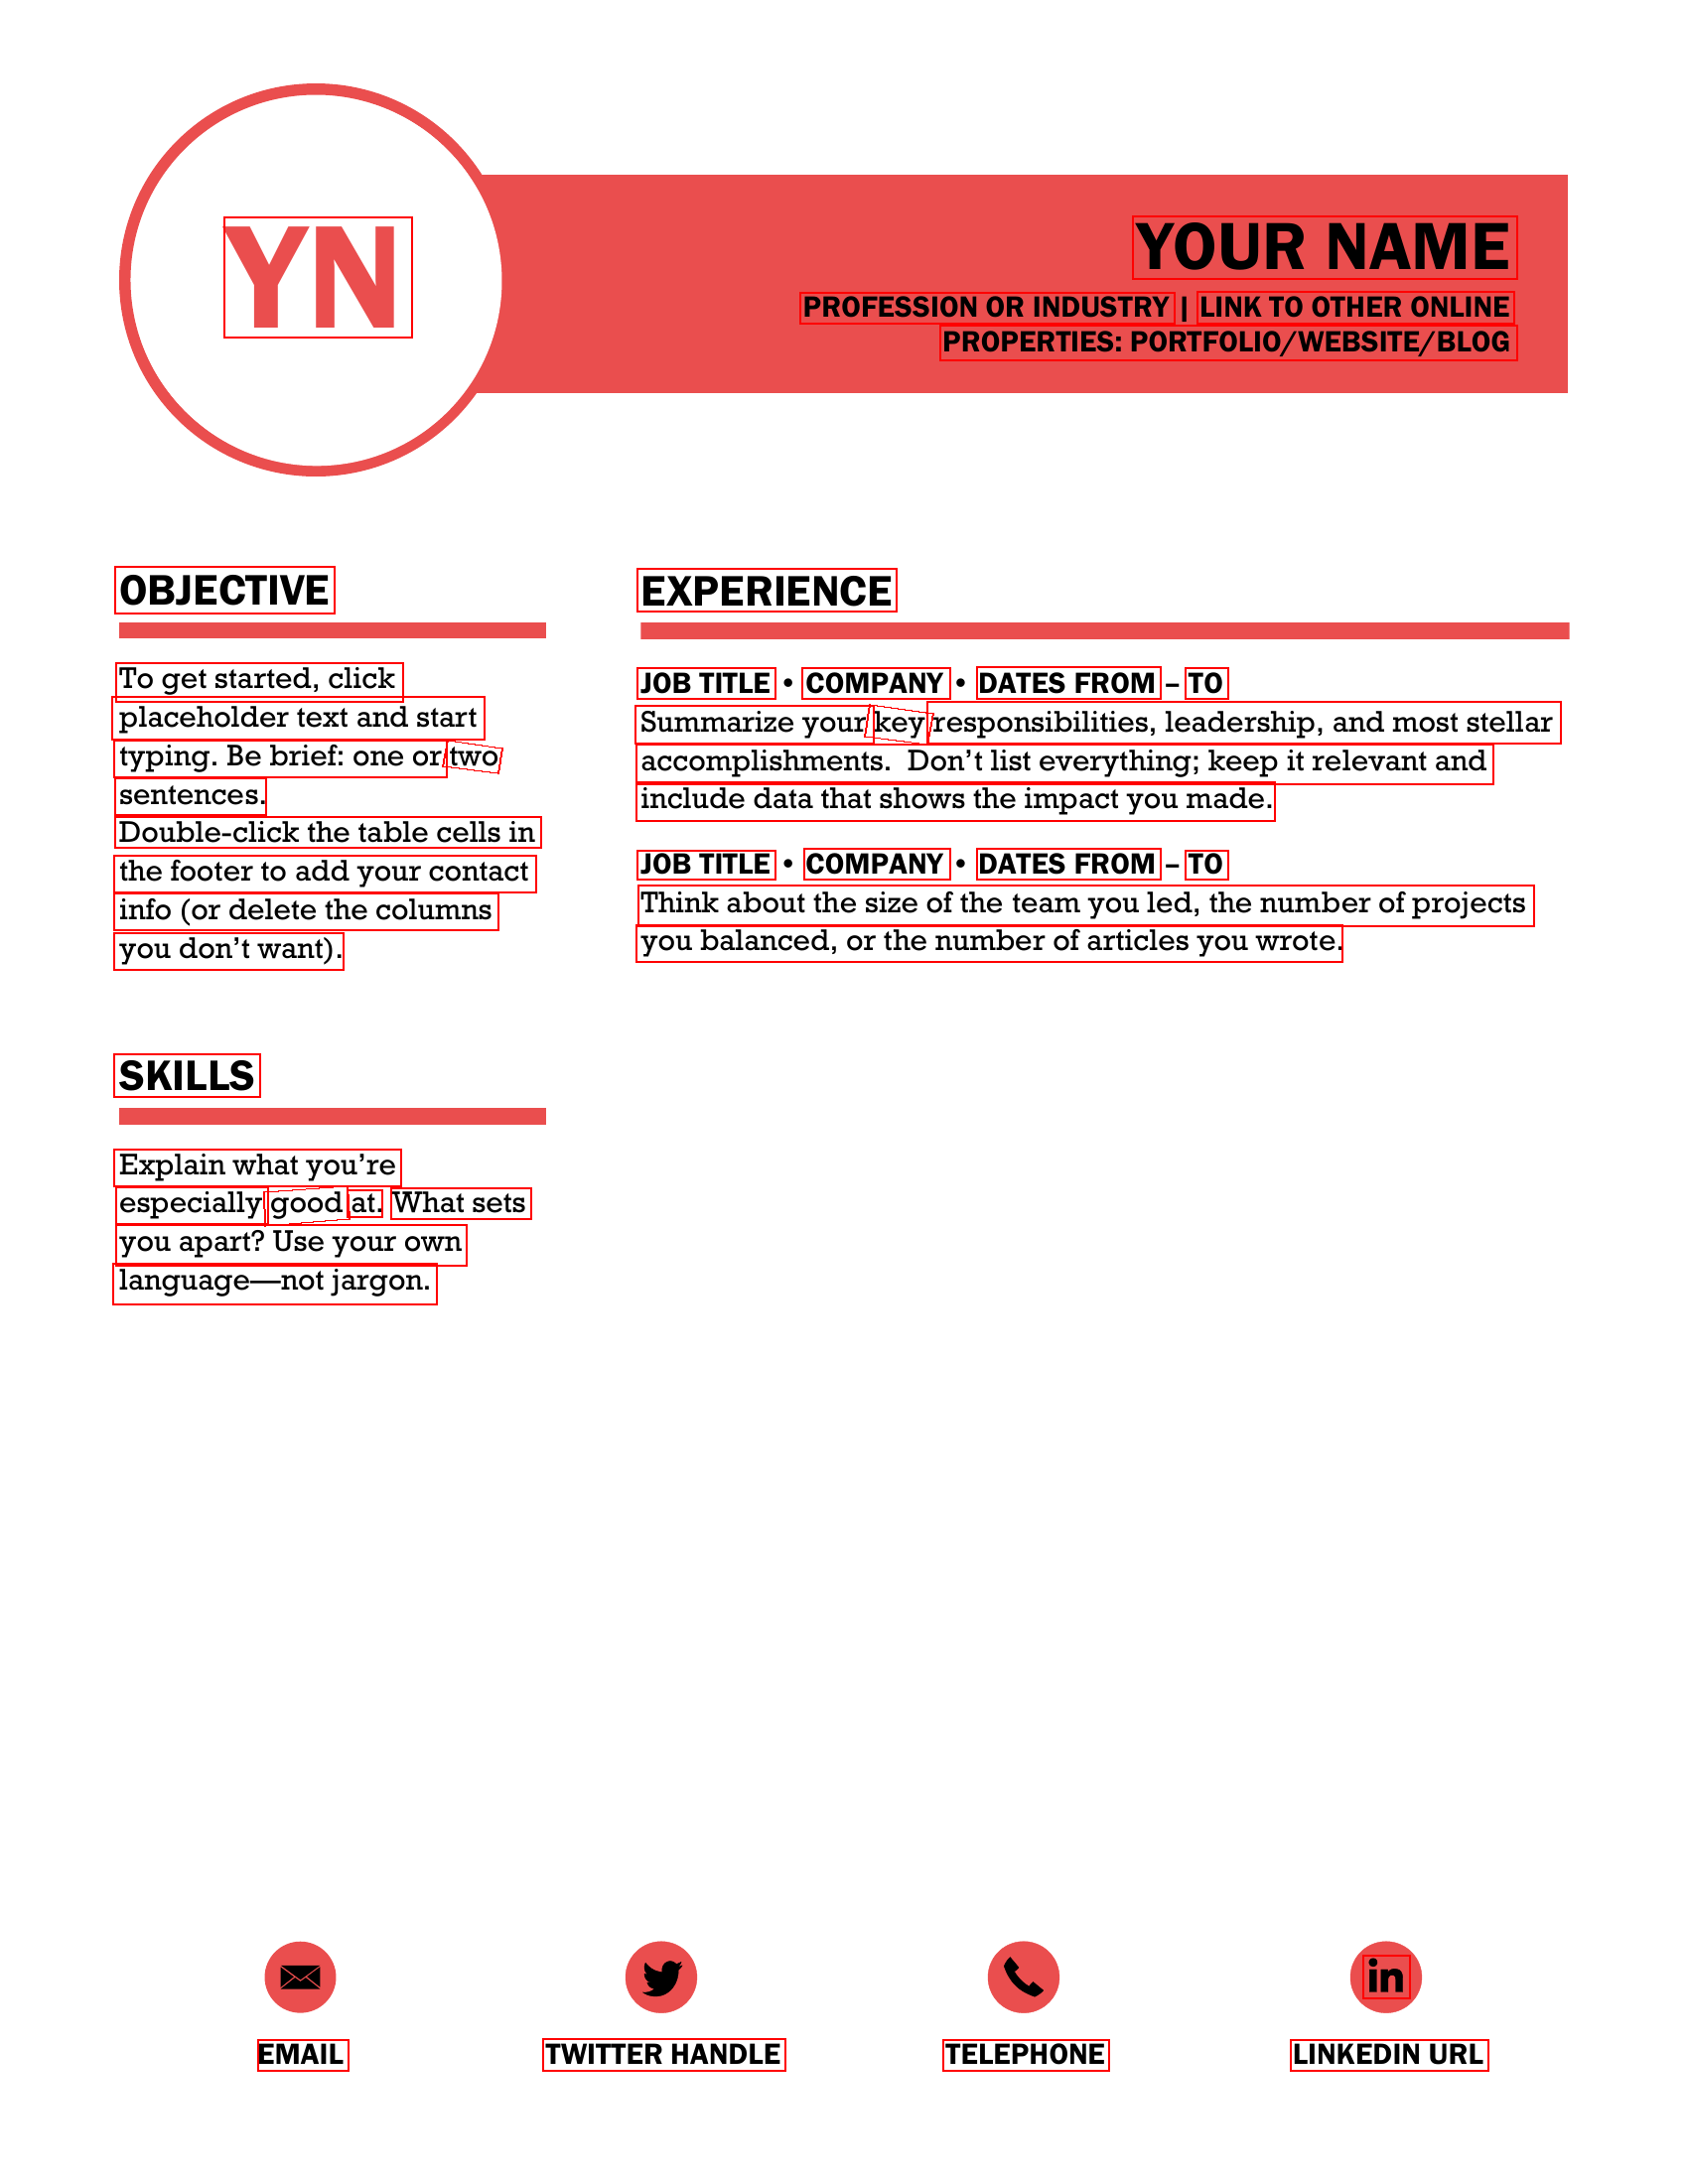

In [31]:
def draw_boxes(image):
    draw = ImageDraw.Draw(image)
    for bound in output:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill='red', width=2)
    return image
draw_boxes(images[page_no])

In [27]:
final = [text[-2] for text in output]
print(final)

['YOUR NAME', 'VOLUNTEER EXPERIENCE OR LEADERSHIP', 'Did you manage a team for your club, lead a project for your', 'favorite charity, or edit your school newspaper? Go ahead and', 'describe', 'experiences that illustrate your leadership abilities:', 'in', '3']
